<a href="https://colab.research.google.com/github/HansHenseler/lcdstrack/blob/main/Oefening_1_Werken_met_het_InceptionV3_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deze oefening wordt beschreven in https://medium.com/abraia/getting-started-with-image-recognition-and-convolutional-neural-networks-in-5-minutes-28c1dfdd401. Origineel notebook is te vinden op https://colab.research.google.com/drive/1VEgSBPRjtRTx4E8BaI2lrUVZvMVx6KGp

# Nieuwe sectie

In [ ]:
!pip install -q keras

# New Section

Load the Inception v3 model

In [ ]:
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3(weights='imagenet', include_top=True)

96124928/96112376 [==============================] - 1s 0us/step


Helper function to pre-process the image and predict classes 

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions

def predict(model, img_path, target_size=(299, 299), top_n=5):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return decode_predictions(preds, top=top_n)[0]

Helper functions to plot results

In [ ]:
import matplotlib.pyplot as plt

def plot_image(img_path):
    img = image.load_img(fn, target_size=(299, 299))
    plt.figure(figsize=(8, 8))
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    
def plot_pred(pred):
    plt.figure(figsize=(8, 2))
    classes = [c[1] for c in pred]
    probas = [c[2] for c in pred]
    y_pos = np.arange(len(classes))
    plt.barh(y_pos, probas, align='center')
    plt.yticks(y_pos, classes)
    plt.gca().invert_yaxis()
    plt.xlabel('Probability')
    plt.xlim(0, 1)

Code to load an image

In [ ]:
from google.colab import files

uploaded = files.upload() 


for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving baseball dog.jpg to baseball dog.jpg
Saving biljart-snooker-bergen-op-zoom.jpg to biljart-snooker-bergen-op-zoom.jpg
Saving dog baseball.jpg to dog baseball.jpg
Saving elephant.jpg to elephant.jpg
Saving viool.jpg to viool.jpg
Saving wolkenlucht.jpg to wolkenlucht.jpg
User uploaded file "baseball dog.jpg" with length 103302 bytes
User uploaded file "biljart-snooker-bergen-op-zoom.jpg" with length 135302 bytes
User uploaded file "dog baseball.jpg" with length 103302 bytes
User uploaded file "elephant.jpg" with length 193846 bytes
User uploaded file "viool.jpg" with length 43665 bytes
User uploaded file "wolkenlucht.jpg" with length 170005 bytes


Makes prediction and shows the input resized image and the results

49152/35363 [=========================================] - 0s 0us/step


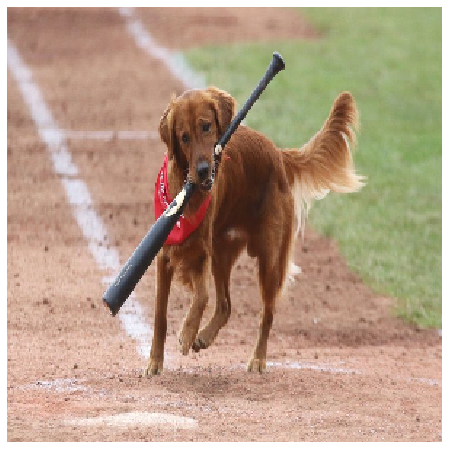

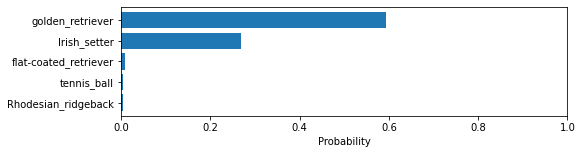

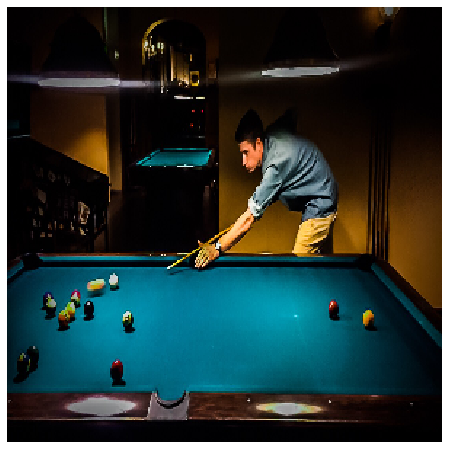

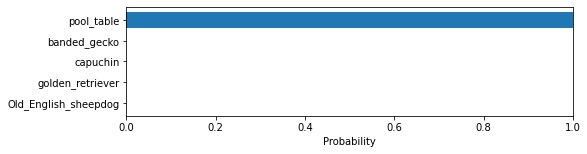

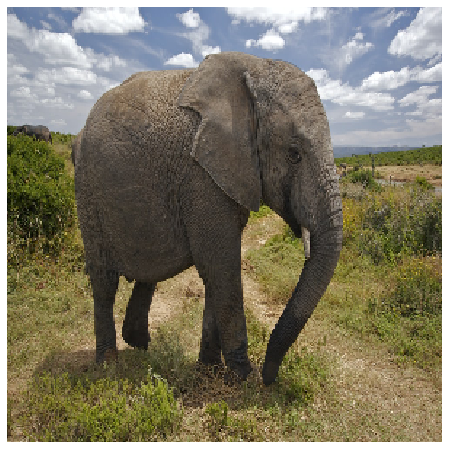

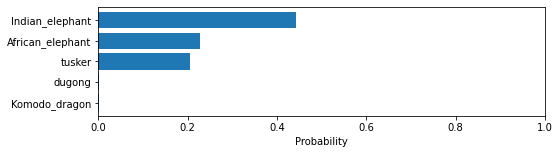

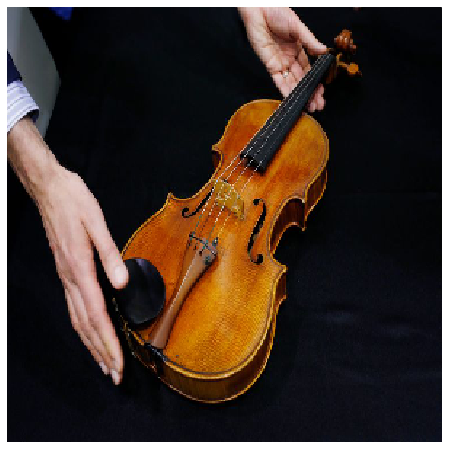

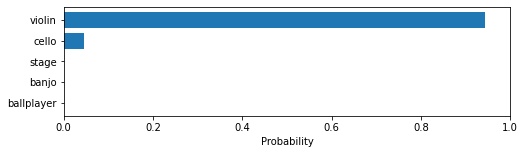

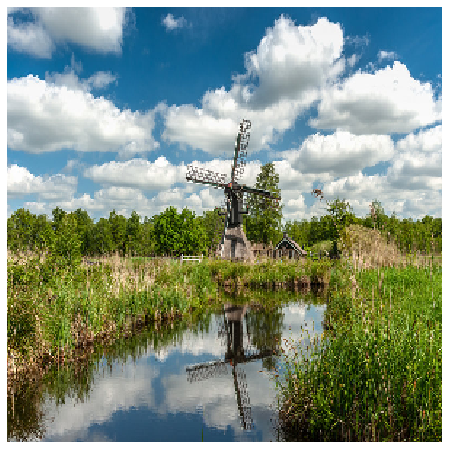

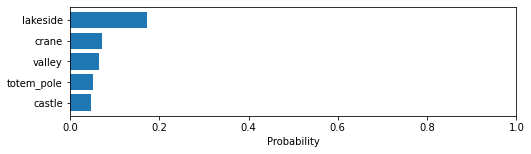

In [ ]:
for fn in uploaded.keys():
  
  pred = predict(model, fn)
  plot_image(fn)
  plot_pred(pred)
  
